In [1]:
%cd C:/users/shrav/Data_Analysis_Projects/Big Projects/Project Starmart/Datasets

C:\users\shrav\Data_Analysis_Projects\Big Projects\Project Starmart\Datasets


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
orders = pd.read_csv("StarMart_Orders.csv")
orders.head()

,line_order_id,order_id,customer_id,product_id,store_id,cashier_id,order_datetime,quantity,final_price
0,STRMRT_LINE_ID_1,STRMRT_ORDR_1,STRMRT_CSTMR_97996,STRMRT_PRD_01_3403,STRMRT_STR_01,STRMRT_EMP_1_5,2024-01-01 07:10:06,9,10.87
1,STRMRT_LINE_ID_2,STRMRT_ORDR_1,STRMRT_CSTMR_97996,STRMRT_PRD_01_1778,STRMRT_STR_01,STRMRT_EMP_1_5,2024-01-01 07:10:06,17,15.35
2,STRMRT_LINE_ID_3,STRMRT_ORDR_1,STRMRT_CSTMR_97996,STRMRT_PRD_01_2728,STRMRT_STR_01,STRMRT_EMP_1_5,2024-01-01 07:10:06,4,14.23
3,STRMRT_LINE_ID_4,STRMRT_ORDR_1,STRMRT_CSTMR_97996,STRMRT_PRD_01_3931,STRMRT_STR_01,STRMRT_EMP_1_5,2024-01-01 07:10:06,6,25.90
4,STRMRT_LINE_ID_5,STRMRT_ORDR_1,STRMRT_CSTMR_97996,STRMRT_PRD_01_2181,STRMRT_STR_01,STRMRT_EMP_1_5,2024-01-01 07:10:06,2,18.35


In [4]:
orders.describe().round(2)

,quantity,final_price
count,3600187.00,3600187.00
mean,4.36,21.43
std,3.98,24.17
min,1.00,0.81
25%,1.00,8.55
50%,3.00,13.73
75%,6.00,23.37
max,66.00,381.19


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3600187 entries, 0 to 3600186
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   line_order_id   object 
 1   order_id        object 
 2   customer_id     object 
 3   product_id      object 
 4   store_id        object 
 5   cashier_id      object 
 6   order_datetime  object 
 7   quantity        int64  
 8   final_price     float64
dtypes: float64(1), int64(1), object(7)
memory usage: 247.2+ MB


# Distribution of Orders

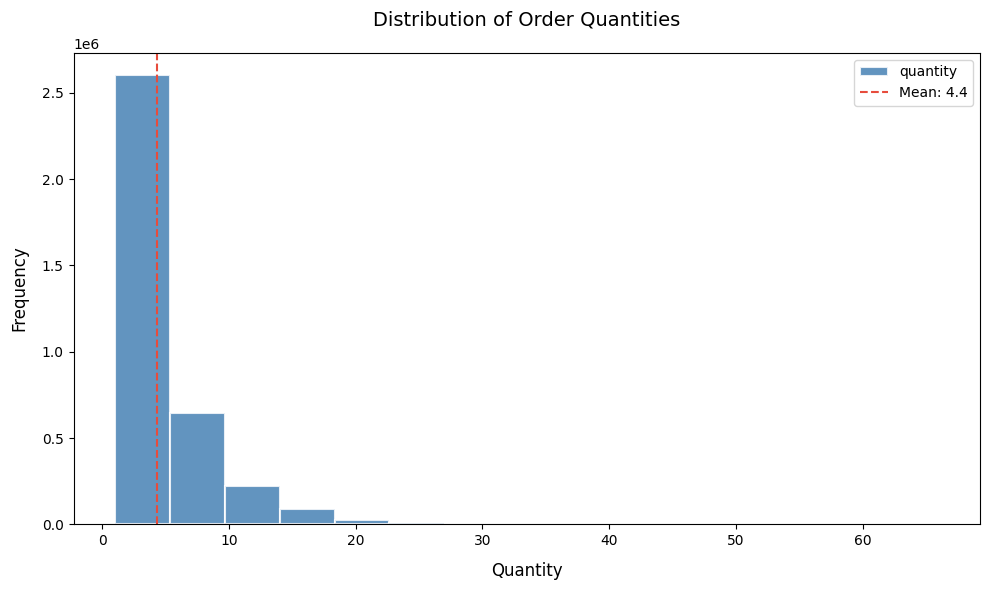

In [6]:
plt.figure(figsize=(10, 6)) 

# Plot histogram
ax = orders.quantity.plot.hist(
    bins=15,
    color="steelblue",  
    edgecolor="white",
    linewidth=1.5,  
    alpha=0.85
)

# Titles & labels
plt.title("Distribution of Order Quantities", fontsize=14, pad=20)
plt.xlabel("Quantity", fontsize=12, labelpad=10)
plt.ylabel("Frequency", fontsize=12, labelpad=10)

# Add a subtle annotation if needed (e.g., mean line)
mean_val = orders.quantity.mean()
ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f}')
ax.legend(fontsize=10)

plt.tight_layout()  # Prevent label cutoff
plt.show()

# Distribution of Selling Price

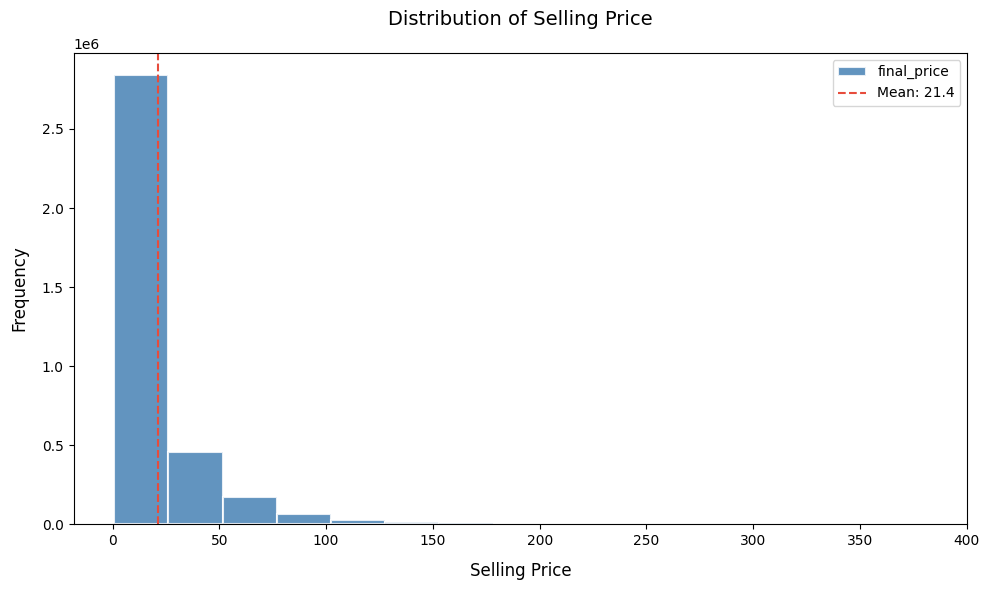

In [10]:
plt.figure(figsize=(10, 6)) 

# Plot histogram
ax = orders.final_price.plot.hist(
    bins=15,
    color="steelblue",  
    edgecolor="white",
    linewidth=1.5,  
    alpha=0.85
)

# Titles & labels
plt.title("Distribution of Selling Price", fontsize=14, pad=20)
plt.xlabel("Selling Price", fontsize=12, labelpad=10)
plt.ylabel("Frequency", fontsize=12, labelpad=10)

mean_val = orders.final_price.mean()
ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=1.5, label=f'Mean: {mean_val:.1f}')
ax.legend(fontsize=10)

plt.tight_layout()  
plt.show()

# Order Count Over Time

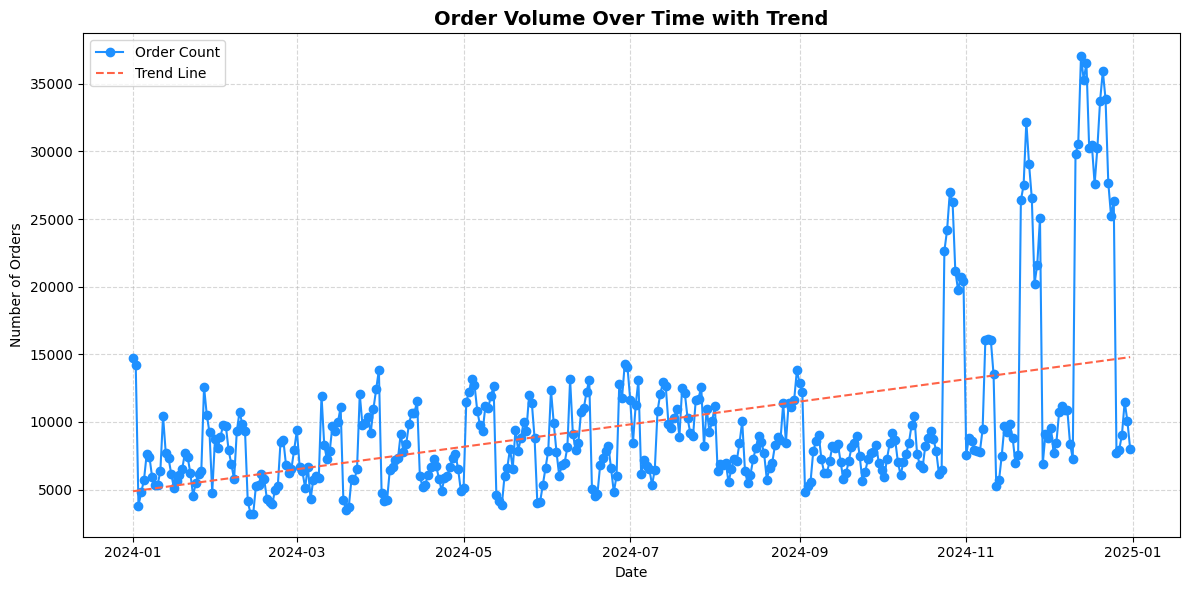

In [11]:
# Convert to datetime
orders['order_datetime'] = pd.to_datetime(orders['order_datetime'])

orders['order_date'] = orders['order_datetime'].dt.date
orders['order_time'] = orders['order_datetime'].dt.time

# Group by datetime and count line_order_id
orders_daily = orders.groupby('order_date')['line_order_id'].count()

# Prepare x (as numeric for regression) and y
x = np.arange(len(orders_daily))
y = orders_daily.values

# Fit linear regression
coef = np.polyfit(x, y, deg=1)
trend = np.poly1d(coef)

# Plot original data
plt.figure(figsize=(12, 6))
plt.plot(orders_daily.index, y, marker='o', label='Order Count', color='dodgerblue')

# Plot trend line
plt.plot(orders_daily.index, trend(x), linestyle='--', color='tomato', label='Trend Line')

plt.title("Order Volume Over Time with Trend", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Average Orders Per Store

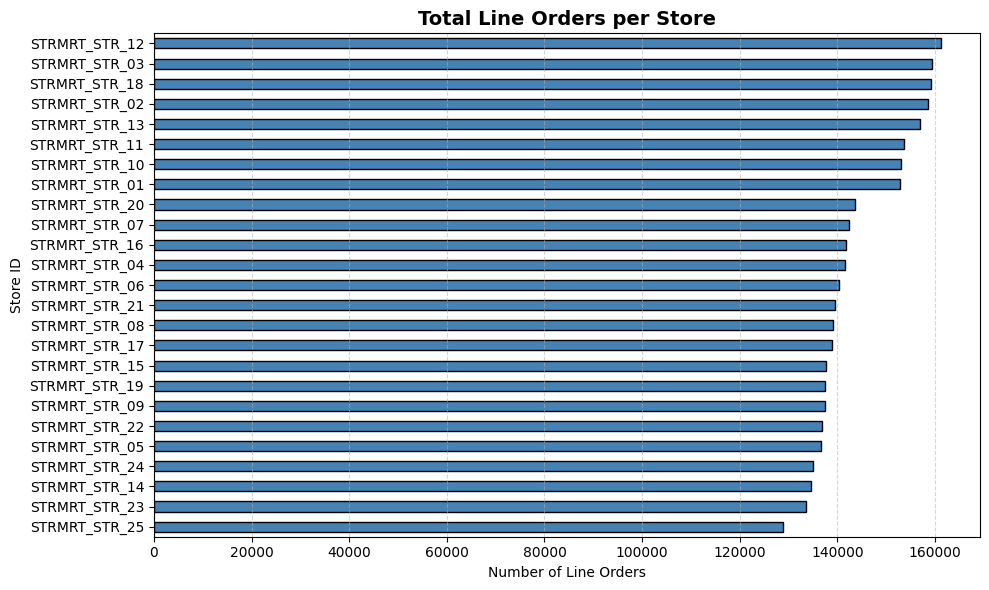

In [12]:
# Step 1: Count how many line orders each store has
store_line_counts = orders.groupby('store_id')['line_order_id'].count()

# Step 2: Barh plot of those counts
import matplotlib.pyplot as plt

store_line_counts = store_line_counts.sort_values()

plt.figure(figsize=(10, 6))
store_line_counts.plot(kind='barh', color='steelblue', edgecolor='black')

plt.title("Total Line Orders per Store", fontsize=14, weight='bold')
plt.xlabel("Number of Line Orders")
plt.ylabel("Store ID")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Total Items Per Order

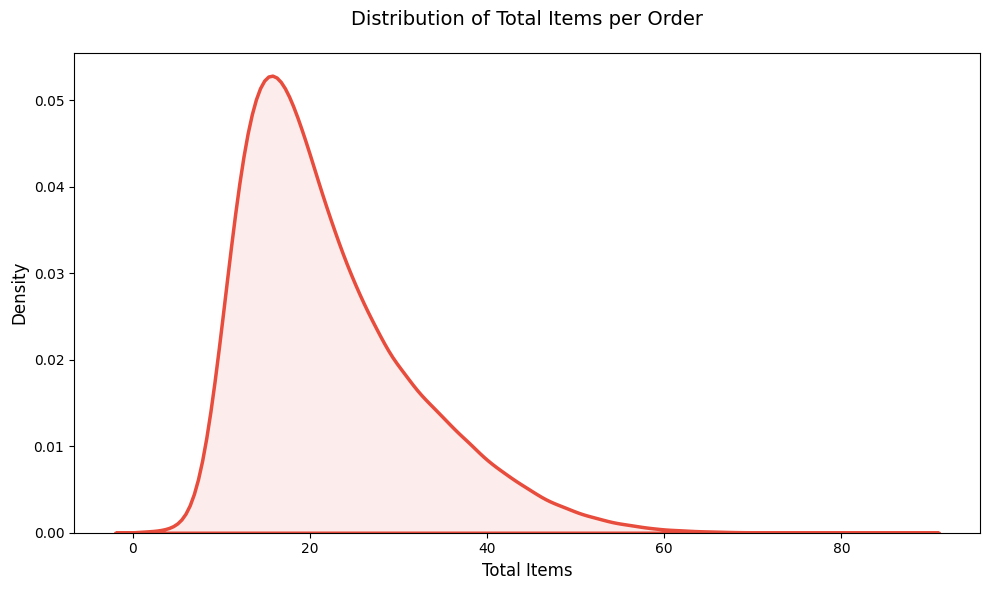

In [14]:
order_grp = orders.groupby('order_id')[['quantity', 'final_price']].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=order_grp,
    x='quantity',
    color='#e74c3c',  # Elegant red
    linewidth=2.5,
    fill=True,  # Fill under curve
    alpha=0.1,  # Light fill
    bw_adjust=1.5 # Smoothing (0.5=more detail, 2=smoother)
)

# Style
plt.title("Distribution of Total Items per Order", fontsize=14, pad=20)
plt.xlabel("Total Items", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.tight_layout()
plt.show()

# Holiday and Normal Day Basket Size

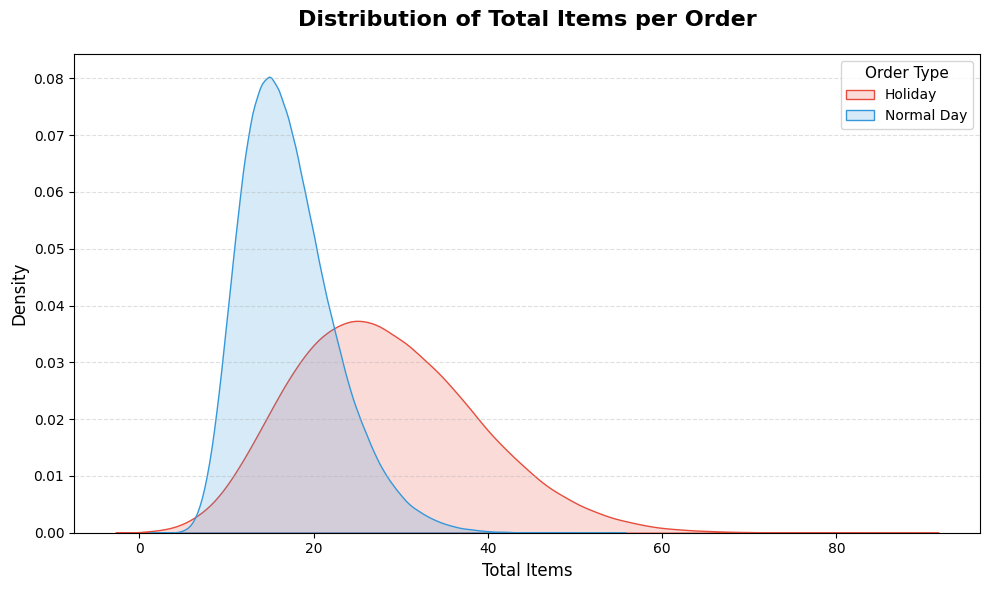

In [15]:
plt.figure(figsize=(10, 6))

holiday_dates = pd.read_csv("StarMart_Holiday_Dates.csv")
holiday_dates['holiday_dates'] = pd.to_datetime(holiday_dates['holiday_dates']).dt.date

holiday_df = orders[orders['order_date'].isin(holiday_dates['holiday_dates'])]
normal_df = orders[~orders['order_date'].isin(holiday_dates['holiday_dates'])]

holiday_grp = holiday_df.groupby('order_id')[['quantity', 'final_price']].sum().reset_index()
normal_grp = normal_df.groupby('order_id')[['quantity', 'final_price']].sum().reset_index()

# KDE for Holiday orders
sns.kdeplot(
    data=holiday_grp,
    x='quantity',
    color='#e74c3c',  # Red
    linewidth=1,
    fill=True,
    alpha=0.2,
    bw_adjust=1.5,
    label='Holiday'
)

# KDE for Normal day orders
sns.kdeplot(
    data=normal_grp,
    x='quantity',
    color='#3498db',  # Blue
    linewidth=1,
    fill=True,
    alpha=0.2,
    bw_adjust=1.5,
    label='Normal Day'
)

# Style
plt.title("Distribution of Total Items per Order", fontsize=16, weight='bold', pad=20)
plt.xlabel("Total Items", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(title="Order Type", fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

# Revenue Over Time

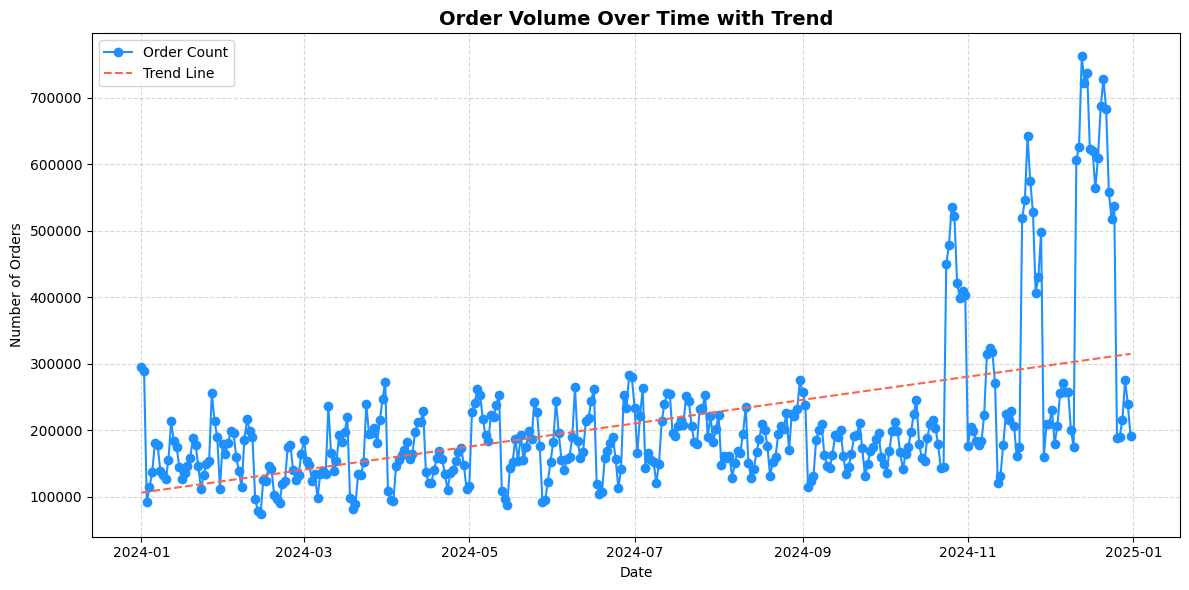

In [16]:
# Group by datetime and count line_order_id
orders_daily_revenue = orders.groupby('order_date')['final_price'].sum()

# Prepare x (as numeric for regression) and y
x = np.arange(len(orders_daily_revenue))
y = orders_daily_revenue.values

# Fit linear regression
coef = np.polyfit(x, y, deg=1)
trend = np.poly1d(coef)

# Plot original data
plt.figure(figsize=(12, 6))
plt.plot(orders_daily_revenue.index, y, marker='o', label='Order Count', color='dodgerblue')

# Plot trend line
plt.plot(orders_daily_revenue.index, trend(x), linestyle='--', color='tomato', label='Trend Line')

plt.title("Order Volume Over Time with Trend", fontsize=14, weight='bold')
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Revenue Over Months

In [17]:
orders['month'] = orders['order_datetime'].dt.month_name()
orders['day_name'] = orders['order_datetime'].dt.day_name()

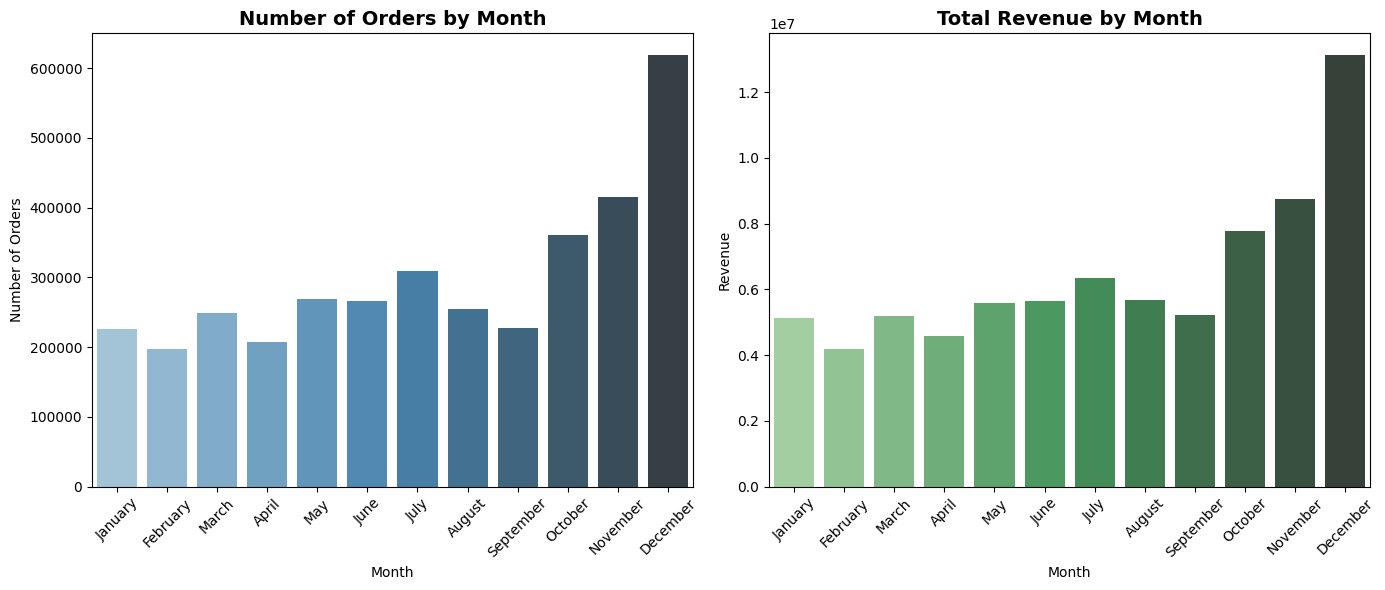

In [18]:
# Order months properly
month_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]

# Aggregate
orders_by_month = orders['month'].value_counts().reindex(month_order)
revenue_by_month = orders.groupby('month')['final_price'].sum().reindex(month_order)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Orders by Month
sns.barplot(
    x=orders_by_month.index,
    y=orders_by_month.values,
    ax=axes[0],
    palette="Blues_d",
    hue=orders_by_month.index
)
axes[0].set_title("Number of Orders by Month", fontsize=14, weight='bold')
axes[0].set_ylabel("Number of Orders")
axes[0].set_xlabel("Month")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Revenue by Month
sns.barplot(
    x=revenue_by_month.index,
    y=revenue_by_month.values,
    ax=axes[1],
    palette="Greens_d",
    hue=orders_by_month.index
)
axes[1].set_title("Total Revenue by Month", fontsize=14, weight='bold')
axes[1].set_ylabel("Revenue")
axes[1].set_xlabel("Month")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

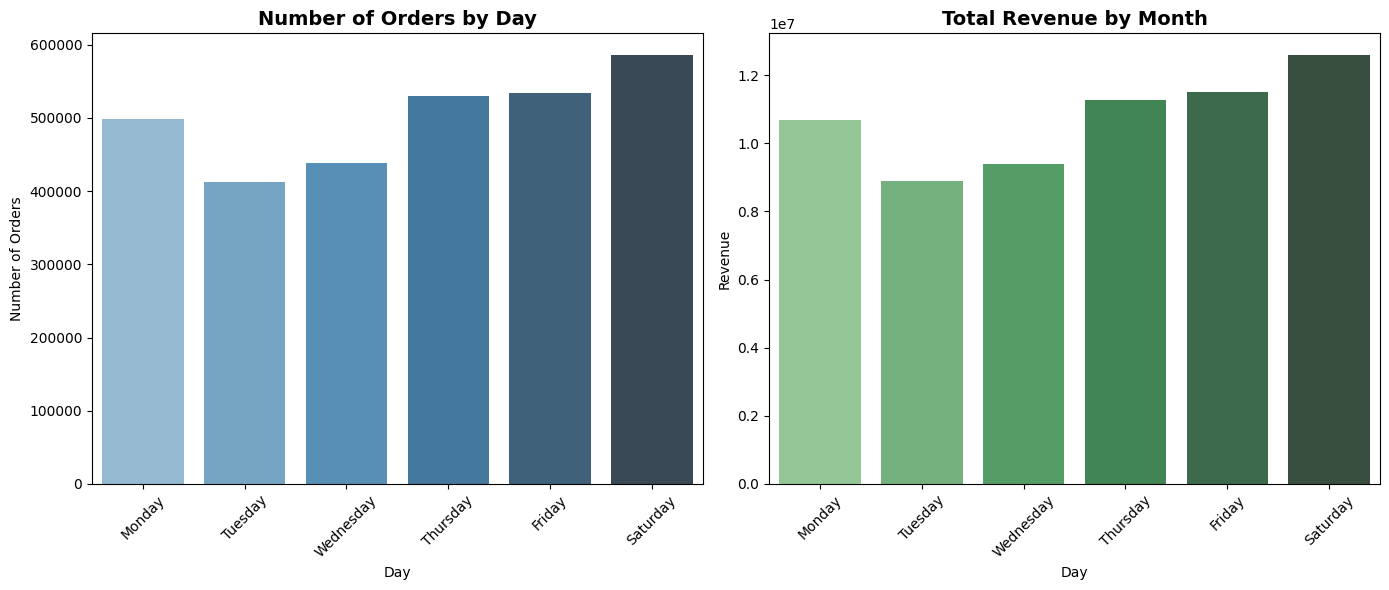

In [19]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Aggregate
orders_by_day = orders['day_name'].value_counts().reindex(day_order)
revenue_by_day = orders.groupby('day_name')['final_price'].sum().reindex(day_order)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot 1: Orders by Month
sns.barplot(
    x=orders_by_day.index,
    y=orders_by_day.values,
    ax=axes[0],
    palette="Blues_d",
    hue=orders_by_day.index
)
axes[0].set_title("Number of Orders by Day", fontsize=14, weight='bold')
axes[0].set_ylabel("Number of Orders")
axes[0].set_xlabel("Day")
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Revenue by Month
sns.barplot(
    x=revenue_by_day.index,
    y=revenue_by_day.values,
    ax=axes[1],
    palette="Greens_d",
    hue=revenue_by_day.index
)
axes[1].set_title("Total Revenue by Month", fontsize=14, weight='bold')
axes[1].set_ylabel("Revenue")
axes[1].set_xlabel("Day")
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Revenue By Store

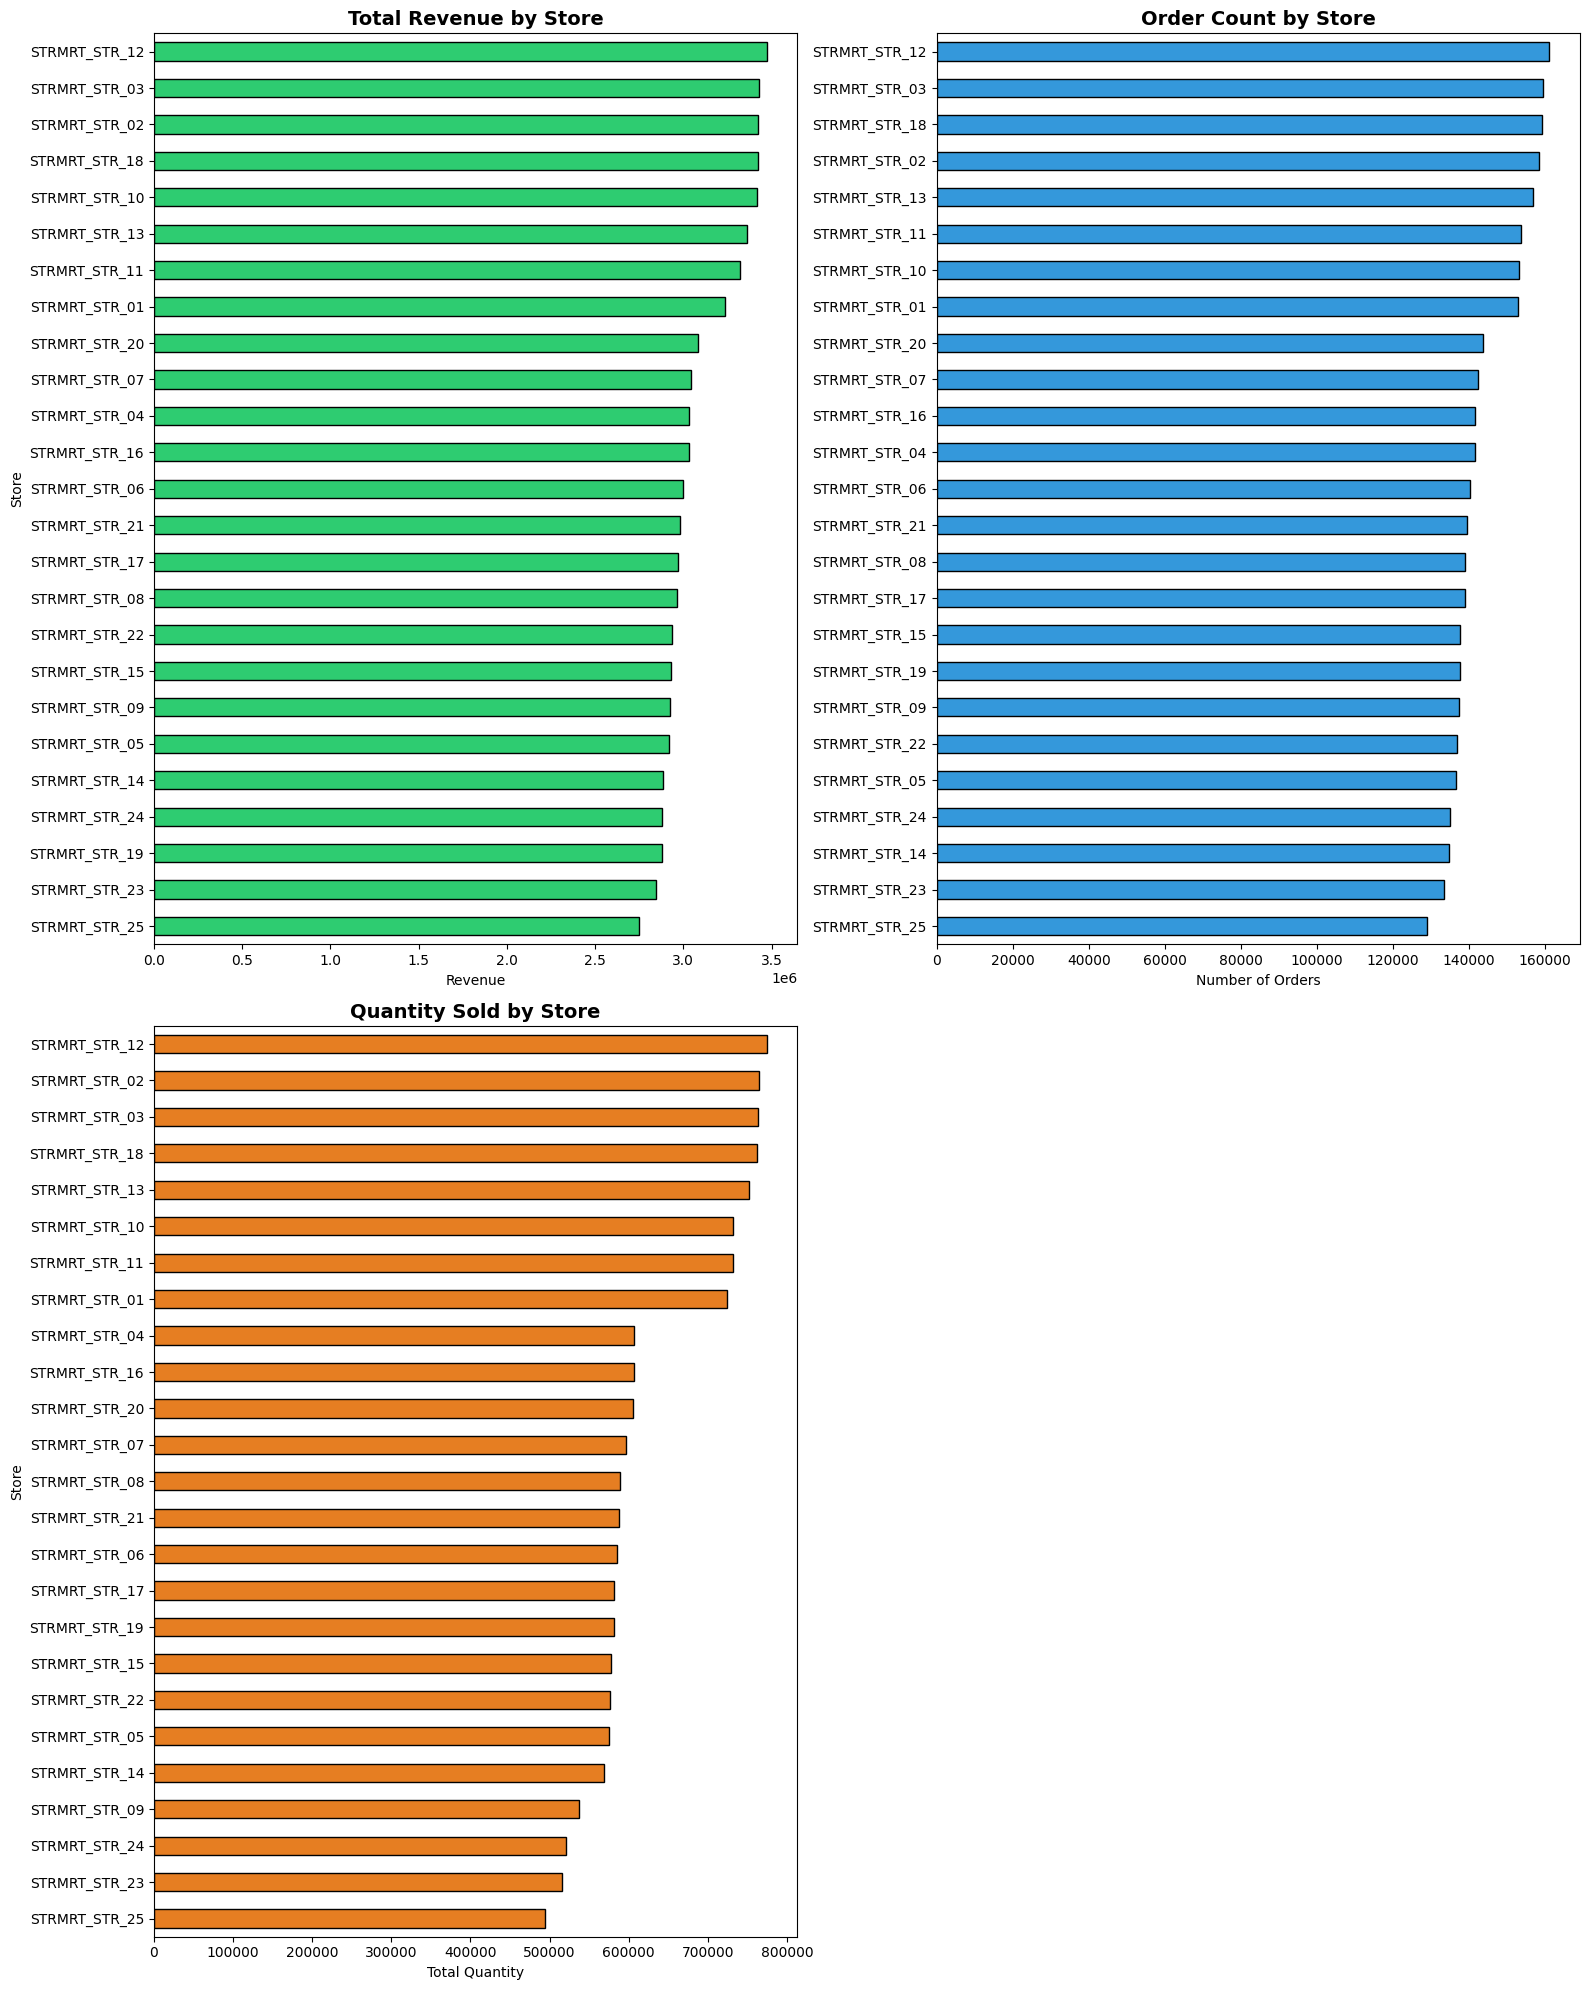

In [20]:
# Group once without selecting columns yet
str_grp = orders.groupby('store_id')

# Calculate metrics
revenue = str_grp['final_price'].sum()
order_count = str_grp['final_price'].count()
quantity_sold = str_grp['quantity'].sum()

# Create 2x2 subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 20))

# Plot 1: Revenue
revenue.sort_values().plot.barh(
    ax=axes[0, 0], color='#2ecc71', edgecolor='black'
)
axes[0, 0].set_title('Total Revenue by Store', fontsize=14, weight='bold')
axes[0, 0].set_xlabel('Revenue')
axes[0, 0].set_ylabel('Store')

# Plot 2: Order Count
order_count.sort_values().plot.barh(
    ax=axes[0, 1], color='#3498db', edgecolor='black'
)
axes[0, 1].set_title('Order Count by Store', fontsize=14, weight='bold')
axes[0, 1].set_xlabel('Number of Orders')
axes[0, 1].set_ylabel('')

# Plot 3: Quantity Sold
quantity_sold.sort_values().plot.barh(
    ax=axes[1, 0], color='#e67e22', edgecolor='black'
)
axes[1, 0].set_title('Quantity Sold by Store', fontsize=14, weight='bold')
axes[1, 0].set_xlabel('Total Quantity')
axes[1, 0].set_ylabel('Store')

# Hide unused 4th subplot
axes[1, 1].axis('off')

# Layout fix
plt.tight_layout()
plt.show()


# Top 10 Customers

## By Quantity Bought

In [21]:
cst_grp = orders.groupby('customer_id')

cst_grp_quantity = cst_grp['quantity'].sum().sort_values(ascending=False)
cst_grp_revenue = cst_grp['final_price'].sum().sort_values(ascending=False)
cst_grp_orders = cst_grp['order_id'].count().sort_values(ascending=False)

cst_grp_quantity.head(10)

customer_id
STRMRT_CSTMR_80315     504
STRMRT_CSTMR_15108     475
STRMRT_CSTMR_50026     469
STRMRT_CSTMR_10568     466
STRMRT_CSTMR_45533     463
STRMRT_CSTMR_113889    461
STRMRT_CSTMR_85629     460
STRMRT_CSTMR_109364    460
STRMRT_CSTMR_40065     459
STRMRT_CSTMR_14099     458
Name: quantity, dtype: int64

# By Purchase

In [22]:
cst_grp_revenue.head(10)

customer_id
STRMRT_CSTMR_48669     2784.70
STRMRT_CSTMR_123629    2603.50
STRMRT_CSTMR_93612     2499.68
STRMRT_CSTMR_21388     2461.31
STRMRT_CSTMR_75275     2410.06
STRMRT_CSTMR_25441     2376.38
STRMRT_CSTMR_54922     2297.39
STRMRT_CSTMR_86449     2283.16
STRMRT_CSTMR_65280     2280.58
STRMRT_CSTMR_149302    2262.26
Name: final_price, dtype: float64

# By Orders

In [24]:
cst_grp_orders.head(10)

customer_id
STRMRT_CSTMR_74062     105
STRMRT_CSTMR_146342    104
STRMRT_CSTMR_113889    103
STRMRT_CSTMR_25441     102
STRMRT_CSTMR_52729      99
STRMRT_CSTMR_10568      99
STRMRT_CSTMR_127430     98
STRMRT_CSTMR_74890      96
STRMRT_CSTMR_13307      96
STRMRT_CSTMR_33211      93
Name: order_id, dtype: int64

In [23]:
# character limit for SQL

object_cols = orders.drop(columns=["order_datetime", "order_date", "order_time", "month", "day_name"]).select_dtypes(include='object')

# Find value with max length in each column
max_length_values = {
    col: object_cols[col].loc[object_cols[col].str.len().idxmax()]
    for col in object_cols.columns
}

# Display results
for col, val in max_length_values.items():
    print(f"Column: {col}\nLength: {len(val)}\nValue: {val}\n{'-'*70}")

Column: line_order_id
Length: 22
Value: STRMRT_LINE_ID_1000000
----------------------------------------------------------------------
Column: order_id
Length: 18
Value: STRMRT_ORDR_100000
----------------------------------------------------------------------
Column: customer_id
Length: 19
Value: STRMRT_CSTMR_118845
----------------------------------------------------------------------
Column: product_id
Length: 18
Value: STRMRT_PRD_01_3403
----------------------------------------------------------------------
Column: store_id
Length: 13
Value: STRMRT_STR_01
----------------------------------------------------------------------
Column: cashier_id
Length: 15
Value: STRMRT_EMP_10_7
----------------------------------------------------------------------
